In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude variables

lats=np.random.uniform(-90.000,90.000, size = 1500)
lngs=np.random.uniform(-180.000,180.000, size = 1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#use the print function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-66.05001592906858 -75.7804000724266
-71.34635973087137 98.40948055244684
29.585238723877723 65.44653537295153
17.535059625397082 162.47370095568613
50.00613694147967 69.86762907878159
32.31582079528347 -111.29172186873866
-89.40053303351883 -65.71379143706488
51.6113952250079 -111.30638855015718
60.09716399598872 37.104872632725176
-22.111726156162234 -81.07780091751972
33.84905174715354 52.90909546498142
23.344560210941125 23.74899604482289
-12.820909779096155 158.50833886615197
76.15197679824155 -115.52529586910022
-77.89721922114866 -96.53076236139987
9.735425155073798 147.5151666545786
65.86411926267988 126.3212027067537
-1.654604354787466 -0.5988941465510038
64.465913582377 -168.27987238977633
55.07174673528715 125.94506868827028
10.870483674896406 -30.017853833857032
-30.192888858709125 -103.64932037463802
81.4253759682199 -148.70075737465493
8.387804503610141 76.87285881681612
-47.80050500954588 89.24991737504479
31.86176144574459 70.76853141564507
-82.87204420751732 43.9044359

In [5]:
#import citipy
from citipy import citipy

In [6]:
#create an open list to hold cities

cities=[]

#identify the nearest city for each lat and long combo.

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique add it to the cities list.
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count.

len(cities)                            

633

In [7]:
#import the requests library
import requests

#import the api key
from config import weather_api_key

In [8]:
#create a variable that will hold the url and api key
url="https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
#create and empty list to hold weather data.

city_data=[]

#print the beginning of the logging.
print("Beginning data retrieval     ")
print("-----------------------------")

#create counters

record_count=1

set_count=1

#loop through the cities in our list.

for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes.
    
    if(i % 50==0 and i>=50):
        
        set_count+=1
        
        record_count=1
        
        time.sleep(60)
    
    #create endpoint URL with each city.
    city_url= url + '&q=' + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city.
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    
    record_count += 1

#run an API request for each of the cities.

    try:
        #parse the JSON file to retrieve the weather
        
        city_weather= requests.get(city_url).json()
        
        #parse the needed data
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
       
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #append the city information into the city_data list.
        
        city_data.append({"City":city.title(), 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,})

#if an error is experienced, skip the city
    except:print("City not found. Skipping...")
    pass

#indicate that Data loading is complete

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval     
-----------------------------
Processing record 1 of Set 1 | ushuaia
Processing record 2 of Set 1 | albany
Processing record 3 of Set 1 | nushki
Processing record 4 of Set 1 | butaritari
Processing record 5 of Set 1 | astana
Processing record 6 of Set 1 | marana
Processing record 7 of Set 1 | hanna
Processing record 8 of Set 1 | lipin bor
Processing record 9 of Set 1 | marcona
City not found. Skipping...
Processing record 10 of Set 1 | ardistan
City not found. Skipping...
Processing record 11 of Set 1 | jalu
Processing record 12 of Set 1 | honiara
Processing record 13 of Set 1 | yellowknife
Processing record 14 of Set 1 | punta arenas
Processing record 15 of Set 1 | lorengau
Processing record 16 of Set 1 | sangar
Processing record 17 of Set 1 | takoradi
Processing record 18 of Set 1 | nome
Processing record 19 of Set 1 | tynda
Processing record 20 of Set 1 | sao filipe
Processing record 21 of Set 1 | lebu
Processing record 22 of Set 1 | barrow
Processing r

In [11]:
len(city_data)

580

In [12]:
#convert the array of dictionaries to a pandas dataframe

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,276.94,65,20,4.63,AR,2022-08-13 15:27:39
1,Albany,42.6001,-73.9662,295.20,57,0,3.23,US,2022-08-13 15:30:36
2,Nushki,29.5542,66.0215,305.66,38,99,2.76,PK,2022-08-13 15:31:10
3,Butaritari,3.0707,172.7902,300.80,76,53,7.31,KI,2022-08-13 15:31:11
4,Astana,51.1801,71.4460,295.12,43,0,2.00,KZ,2022-08-13 15:31:12
5,Marana,32.4367,-111.2254,304.39,62,0,2.57,US,2022-08-13 15:31:12
6,Hanna,51.6334,-111.9018,296.40,48,22,3.13,CA,2022-08-13 15:31:13
7,Lipin Bor,60.2622,37.9763,292.05,78,98,2.63,RU,2022-08-13 15:31:14
8,Jalu,29.0331,21.5482,309.04,24,1,8.57,LY,2022-08-13 15:31:15
9,Honiara,-9.4333,159.9500,297.68,87,71,1.34,SB,2022-08-13 15:31:16


In [16]:
#re-arrange the columns in the dataframe by creating a variable and then implementing in a dataframe.

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-08-13 15:27:39,-54.8000,-68.3000,276.94,65,20,4.63
1,Albany,US,2022-08-13 15:30:36,42.6001,-73.9662,295.20,57,0,3.23
2,Nushki,PK,2022-08-13 15:31:10,29.5542,66.0215,305.66,38,99,2.76
3,Butaritari,KI,2022-08-13 15:31:11,3.0707,172.7902,300.80,76,53,7.31
4,Astana,KZ,2022-08-13 15:31:12,51.1801,71.4460,295.12,43,0,2.00
...,...,...,...,...,...,...,...,...,...
575,Traiguen,CL,2022-08-13 15:48:42,-38.2500,-72.6833,284.00,82,87,8.54
576,Braganca,BR,2022-08-13 15:48:43,-1.0536,-46.7656,304.45,53,81,4.05
577,Kenora,CA,2022-08-13 15:48:32,49.8167,-94.4337,294.69,78,75,3.09
578,Kenai,US,2022-08-13 15:48:44,60.5544,-151.2583,284.90,98,100,2.57


In [17]:
#create an output file to csv

output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City ID")

In [18]:
#extract relevant fields for new weather scatter chart.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

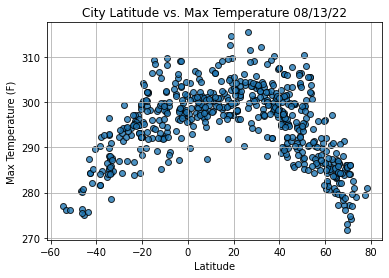

In [31]:
#import the time module

import time

#build the scatter plot for latitude vs. max temp.

plt.scatter(lats,
            max_temps,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig1.png")

#show the plot

plt.show()

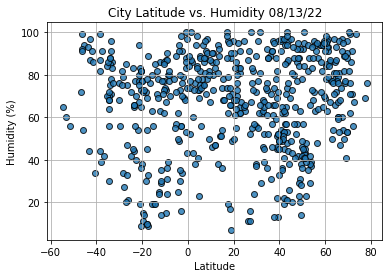

In [32]:
#build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig2.png")

#show the plot

plt.show()

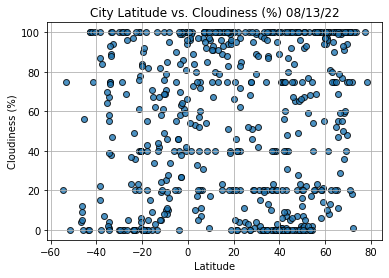

In [34]:
#build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig3.png")

#show the plot

plt.show()

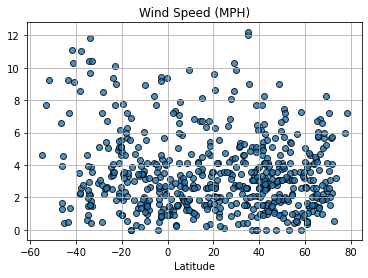

In [35]:
#build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="k", linewidth=1, marker='o',
            alpha=0.8,label = 'Cities')

#incorporate the other graph properties

plt.title (f"Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig4.png")

#show the plot

plt.show()